In [1]:
import numpy as np

from numpy.polynomial.polynomial import polyvalfromroots

from matplotlib import pyplot as plt
%matplotlib inline

from tbcontrol.plotting import cross_axis

from ipywidgets import interact



# Respuesta en frecuencia

La respuesta en frecuencia de un sistema hace referencia a cómo reacciona en estado estacionario ante entradas sinoidales. Analizar dicha respuesta para sistemas en lazo abierto permite determinar estabilidad de los mismos en lazo cerrado. Para analizar la respuesta en frecuencia desde la función de transferencia en el dominio de Laplace se elimina la parte real de la variable $s$.

La función de transferencia de lazo cerrado es

$$\frac{G(s)}{1+G(s)}$$

Como interesa que $s = j\omega$, la expresión queda:

$$\frac{G(j\omega)}{1+G(j\omega)}$$

Para verificar la estabilidad del sistema en lazo cerrado, debe verificarse que 

$$ |G(j\omega_{\pi}| < 1 \; \text{cuando} \; \angle G(j\omega_{\pi}) = \pi $$

Suponga dos funciones de transferencia:

$$G_1(s)=\frac{1}{\tau_1s+1}$$

$$G_2(s)=\frac{1}{\tau_2^2s^2+2\zeta \tau_2 s +1}$$

A menudo se usan escalas logarítmicas para generar gráficas de respuesta en frecuencia.


In [2]:
omega = np.logspace(-2, 2, 1000)
s = omega*1j

In [3]:
tau1 = 2
G1 = 1 / (tau1*s+1)

tau2 = 1
zeta = 0.5
G2 = 1/(tau2**2*s**2 + 2*tau2*zeta*s+1)

## Diagramas de bode

Una gráfica de $|G(j\omega)| \; \text{vs} \; \omega$ junto a un gráfica de $\angle G(j\omega) \; \text{vs} \; \omega$

In [4]:
def bode(G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    
    ax_mag.loglog(omega, np.abs(G))
    ax_mag.loglog(omega, np.ones(len(omega)))
    ax_mag.grid(True)
    ax_phase.semilogx(omega, np.angle(G))
    # ax_phase.semilogx(omega, np.unwrap(np.angle(G)))
    ax_phase.semilogx(omega, -3.14*np.ones(len(omega)))
    ax_phase.grid(True)


Diagrama de Bode del sistema G1

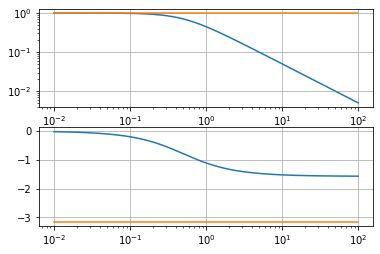

In [5]:
bode(G1)

Observe que el sistema no alcanza a tener desfase de $\pi$, esto indica que el sistema en lazo cerrado será estable.

Diagrama de Bode del sistema G2

Observe que el sistema no alcanza a tener desfase de $\pi$, esto indica que el sistema en lazo cerrado será estable.

Diagrama de Bode del sistema G1 conectado en serie con G2

- Observe que el sistema alcanza a tener desfase de $\pi$ a una frecuencia de aproximadamente $1$.
- A esa misma frecuencia, la ganancia es $<1$.
- Esto indica que el sistema en lazo cerrado será estable, sin embarg, si la ganancia crece, el sistema en lazo cerrado será inestable.

## Nyquist

Una gráfica de $\Re \{G(j\omega)\} \; \text{vs} \; \Im \{G(j\omega)\}$. Es común graficar el comportamiento para frecuencias negativas.

In [6]:
def nyquist(G):
    plt.plot(G.real, G.imag,
             G.real, -G.imag)
    plt.plot([0.0,-1.0],[0.0,0.0],'k')
    plt.xlabel('Real')
    plt.ylabel('Imag')
    plt.axis('equal')
    plt.grid(True)

Diagrama de Nyquist del sistema G1

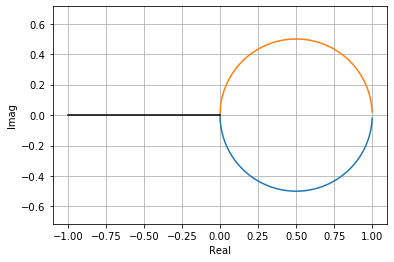

In [7]:
nyquist(G1)

Observe que el sistema no alcanza a tener desfase de $\pi$, esto indica que el sistema en lazo cerrado será estable.

Diagrama de Nyquist del sistema G2

Observe que el sistema no alcanza a tener desfase de $\pi$, esto indica que el sistema en lazo cerrado será estable.

Diagrama de Nyquist del sistema G1 conectado en serie con G2

- Observe que el sistema alcanza a tener desfase de $\pi$.
- A esa misma frecuencia, la parte real es aproximadamente $0.2$
- A esa frecuencia, la ganancia es $<1$.
- Esto indica que el sistema en lazo cerrado será estable, sin embargo, si la ganancia crece, el sistema en lazo cerrado será inestable.

------------

La librería `control` permite analizar el sistema en el dominio de la frecuencia.

In [8]:
import control

In [9]:
G1C = control.tf(1, [tau1, 1])

Defina G2 con la librería `control`

In [10]:
# G2C

Diagrama de Bode del sistema G1

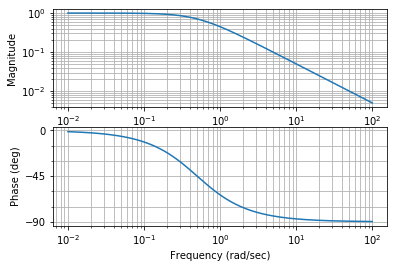

In [11]:
control.bode(G1C, omega,);

Diagrama de Nyquist del sistema G1

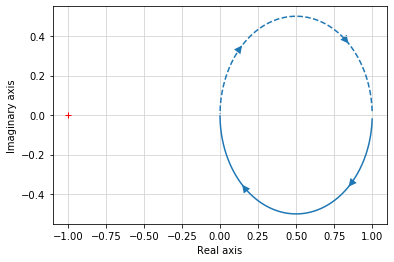

In [12]:
control.nyquist_plot(G1C, omega);

Genere y analice los diagramas de Bode y de Nyquist para los sistemas $G_1$, $G_2$ y su serie.

Preste atención al sistema $G_1G_2$.
- ¿Cuánto podría aumentar la ganancia antes de hacer que el sistema en lazo cerrado se vuelva inestable?

- Verifique con simulaciones

Repita sus analisis con:

$$G_{e1}(s)=\frac{1}{s}$$

$$G_{e2}(s)=\frac{1}{s(s+1)}$$

$$G_{e3}(s)=\frac{2}{(0.3s+1)(0.3s+1)}$$

$$G_{e4}(s)=\frac{2}{(0.3s+1)(0.3s+1)}$$

$$G_{e5}(s)=\frac{s+2}{2s^3 + 3s^2 + 4s + 1}$$


- ¿Qué puede decir de la estabilidad de cada sistema cuando se cierre el lazo?

- De ser estable en lazo cerrado, ¿cuánto podría aumentar la ganancia antes de hacer que el sistema en lazo cerrado se vuelva inestable?

- De ser inestable en lazo cerrado, ¿cuánto debería bajar la ganancia antes de hacer que el sistema en lazo cerrado se vuelva estable?

- Verifique con simulaciones
